<h1>Model Development</h1>
In data analysis we would like to make some predictions implied form given data. For example we would like to now if the price offered by us is fair and not to high or too low.

In [1]:
# import nesceseary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lets download our cars-dataset
df = pd.read_csv("clean_autos.csv")

<h2> Linear Regression and Multiple Linear Regression </h2>
<ul>
    <li> X - predicator variable </li>
    <li> Y - response variable </li>
</ul> 
<b>Linear Function</b> That try's to fit model by finding $\beta_0, \beta_1$ (intercept, slope) is
<center> $\hat{Y} = \beta_0 + \beta_1 X$. </center>
<p>Where $\hat{Y} \approx Y$ - true response. </p>

In [3]:
# lets import modlues for linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm
# we can put it simpler by
# from sklearn.linear_model import LinearRegression as lm

LinearRegression()

<p>Lets try to make a price predictions using highway-mpg as predicator variable to fit linear regression. </p>

In [4]:
# assign predicator and respone variable
x = df[["highway-mpg"]]
y = df["price"]
# fit linear regression model
lm.fit(x,y)

LinearRegression()

In [5]:
yhat = lm.predict(x)
#yhat[:10]
# intercept 
b0 =  lm.intercept_
b1 = lm.coef_
print(f"Slope b0 = {b0}, intercept b1 = {b1}")

Slope b0 = 38423.305858157386, intercept b1 = [-821.73337832]


<p> Now lets make a prediction of a price according to engine-szie </p>

In [6]:
# create a LR object
lm1 = LinearRegression()
# check if it worked
lm1

LinearRegression()

In [7]:
# calculate a coefficients with fit(predicator,response) 
lm1.fit(df[["engine-size"]],df[["price"]])
b1_0 =  lm1.intercept_
# take a look how nested data out we get
print(b1_0)
b1_1 = lm1.coef_
print(b1_1)
print(f"Our Linear model is: Yhat = {b1_0[0]} + {b1_1[0][0]} X")

[-7963.33890628]
[[166.86001569]]
Our Linear model is: Yhat = -7963.338906281046 + 166.86001569141598 X


<p> To create predictions ($\hat{Y}$) we can do it using lm.prediction() or manually type equetion  $\hat{Y} = \beta_0 + \beta_1 X$ with calculated coeficients. </p>

<b> Multiple Linear Regression </b>
<p> We can have more then one predicator. Our response can depend on n's prediction variables as</p>
<center> $\hat{Y} = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n $ </center>
<p> Where inrecept is $\beta_0$ and coefficients $\beta_1, \beta_2, ..., \beta_n$ </p>

<b> Example </b> From previous parts if we analyze pearson coeficients and p-values of all fearures (separetadly) with price, we deduce that horsepower, curb-weight, engine-size, highway-mpg are good predicators.

In [8]:
# create regression obj
lm_Z = LinearRegression()
# lets create a predicators vector
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]
# fit the model
lm_Z.fit(Z, df["price"])


LinearRegression()

In [9]:
print(f"inrecept = {lm_Z.intercept_}, coefficients = {lm_Z.coef_}")

inrecept = -15811.863767729246, coefficients = [53.53022809  4.70805253 81.51280006 36.1593925 ]


Writing dawn our model we got:
<p> $\hat{Price} = $ -15811.863767729246 + 53.53022809 x <b> horsepower </b> + 4.70805253 x <b> crub-weight </b> + 81.51280006 x <b> engine-size </b> + 36.1593925 x <b> highway-mpg </b> </p>

In [10]:
Price = -15811.863767729246 + 53.53022809*df["horsepower"] + 4.70805253*df["curb-weight"]  + 81.51280006*df["engine-size"] + 36.1593925*df["highway-mpg"]

In [11]:

err = abs(Price - df["price"])/df["price"]*100
#print(err)
price = pd.concat([Price, err], axis=1)

In [12]:
price.columns

RangeIndex(start=0, stop=2, step=1)

In [13]:
price.rename(columns={0:"predicted price", 1:"error%"},inplace=True)

In [14]:
compare_df = pd.concat([df["price"],price],axis=1)
compare_df.head(30)

,price,predicted price,error%
0,13495.0,13699.077002,1.512242
1,16500.0,13699.077002,16.975291
2,16500.0,19052.713464,15.470991
3,13950.0,10620.615242,23.866557
4,17450.0,15520.900251,11.055013
5,15250.0,13869.274636,9.053937
6,17710.0,15455.888338,12.727903
7,18920.0,15973.774116,15.572018
8,23875.0,17612.782930,26.229181
9,16430.0,10722.479868,34.738406


<h2> Model evaluation using Visualisation </h2>
<p>As we can see we can fit a model with resonably chosen predicators, but how to asses if they are good? Going through above table seems to be timeconsuming. Faster, if using our seanses is to use some plots.</p>

(0.0, 48164.5626999714)

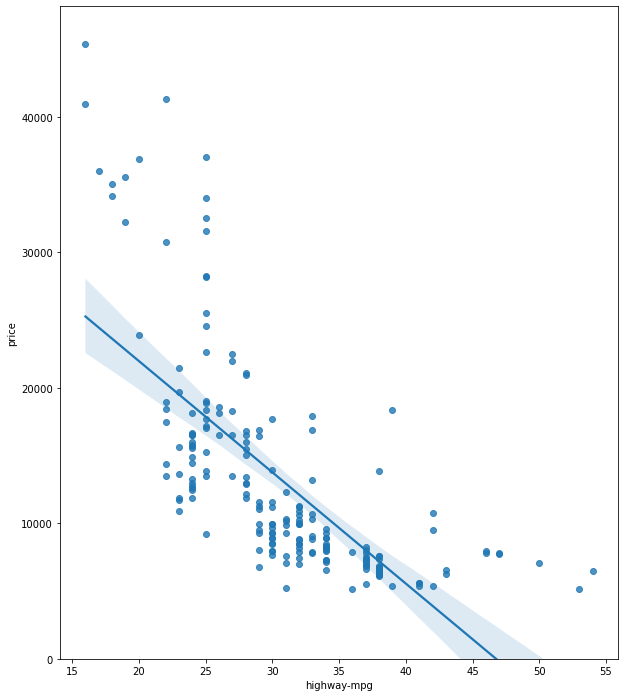

In [15]:
import seaborn as sns
width, height = 10, 12
fig, ax = plt.subplots(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df,ax=ax)
ax.set_ylim(0,)
# plt.ylim(0,) would also work

<p>We see here negative correlation between highway-mpg and price, but also noticeble is that data with low and high highway-mpg far sccatered. But data in the middle behaves just fine^^.</p> 
<p> We could also compare above plot with another, for example ploting peak-rpm vs price. Yet resonable approach is still to you Pearson correlation. </p>

In [16]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<p>As we can see highway-mpg and price have absolutely greater correlation (-0.704692) than peak-rpm and price (-0.101616). </p> 
<p> But it is not the only way to check performence of a model. We can calculate $RMSE$ and $R^2$ value.</p>

<h2> Residual Plot </h2>
This time we would like to observe how variance of the data behaves. We will use a residual plot to do this. Where residual is a distance from $Y$-response and $\hat{Y}$-prediction.
<p>So what is a <b>residual plot</b>?</p>
<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>
<p>What do we pay attention to when looking at a residual plot?</p>
<p>We look at the spread of the residuals:</p>
<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.
Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

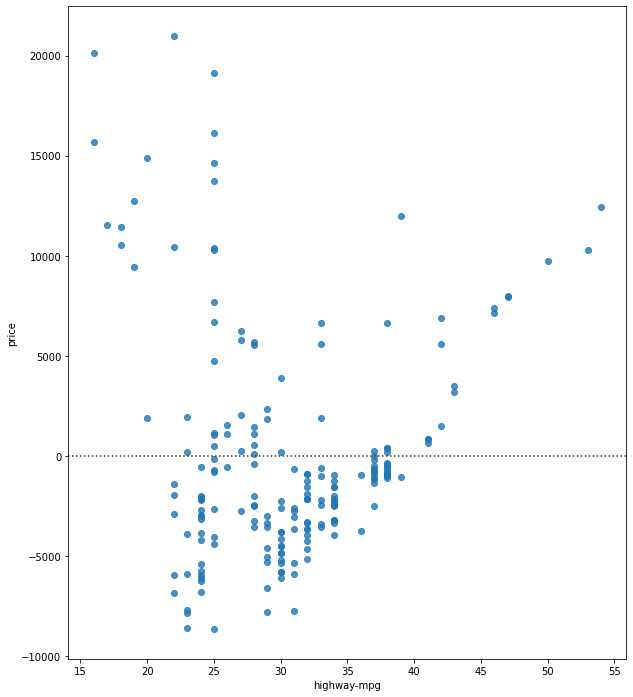

In [17]:
# take a look at example
# we can assign our data diffrently like
fig1, ax1 = plt.subplots(figsize=(width,height))
sns.residplot(x=df["highway-mpg"],y=df["price"],ax=ax1)

<p> This plot shows us spread of residuals around x-axis ( black one ). And we can see that residuals are not randomly spreaded. So this indicates that out linear model is maybe not the best apporach and maybe we should use some non-linear?</p>

<h2> Multiple Linear Regression </h2>
<p> Here situation gets more complecated. Because we can't possible visualize regression model with more then two predicators... </p>
<p> For example what if we wanted to try visualize predictions of price based on "horsepower","curb-weight","engine-size","highway-mpg"</p>
<p> One way two do this is by looking at the distribution plot of predicted response vs true respone variables. </p>

In [18]:
"""
# THIS IS THE OLD WAY!!!
# create predicted response
Y_hat = lm_Z.predict(Z)
# plot two distribuitions of price & predicted price
fig2, ax2 = plt.subplots(figsize=(width,height))
sns.distplot(df["price"],hist=False,color='r',label="price",ax=ax2)
sns.distplot(Y_hat,hist=False,color='b',label="predoceted price",ax=ax2)

ax2.set_title('Actual vs Fitted Values for Price')
ax2.set_xlabel('Price (in dollars)')
ax2.set_ylabel('Proportion of Cars')

plt.show()
plt.close()
"""

'\n# THIS IS THE OLD WAY!!!\n# create predicted response\nY_hat = lm_Z.predict(Z)\n# plot two distribuitions of price & predicted price\nfig2, ax2 = plt.subplots(figsize=(width,height))\nsns.distplot(df["price"],hist=False,color=\'r\',label="price",ax=ax2)\nsns.distplot(Y_hat,hist=False,color=\'b\',label="predoceted price",ax=ax2)\n\nax2.set_title(\'Actual vs Fitted Values for Price\')\nax2.set_xlabel(\'Price (in dollars)\')\nax2.set_ylabel(\'Proportion of Cars\')\n\nplt.show()\nplt.close()\n'

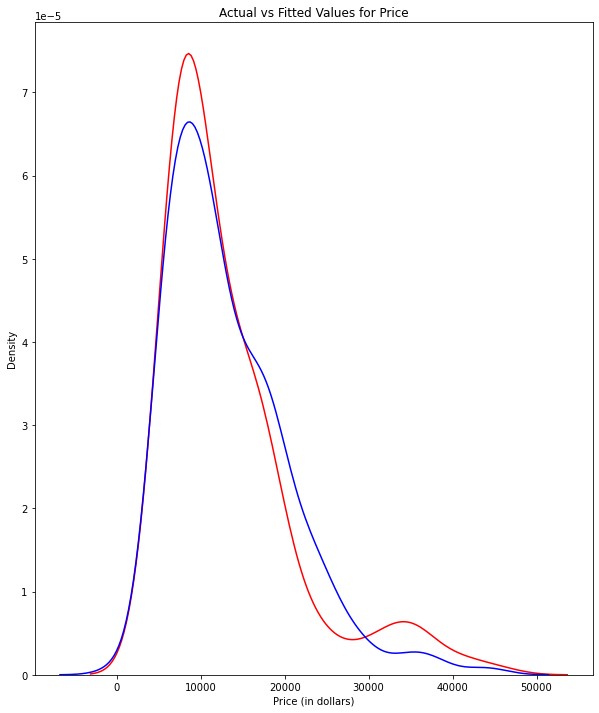

In [19]:
# create predicted response
Y_hat = lm_Z.predict(Z)

# plot two distributions of price & predicted price using KDE plot
fig2, ax2 = plt.subplots(figsize=(width,height))
sns.kdeplot(df["price"], color='r', label="price", ax=ax2)
sns.kdeplot(Y_hat, color='b', label="predicted price", ax=ax2)

ax2.set_title('Actual vs Fitted Values for Price')
ax2.set_xlabel('Price (in dollars)')
ax2.set_ylabel('Density')

plt.show()
plt.close()


<p>We can see that model is resonable good. Yet there's still room for improvement.</p>

<h2> Polynomial Regression an Pipelines </h2>
<p><b> Polynomial regression </b> is a case of general linear regression model or multiple regression models. Because we take higher-order terms as</p>
* <b> Quadratic - 2nd order </b>
<center> $\hat{Y} = \beta_0 + \beta_1 X + \beta_2 X^2$ </center>
* <b> nth-order </b>
<center> $\hat{Y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + ... \beta_n X^n$ </center>
<p> Actaully we say that these are not linear models, buut if we take as a $X_i = X^i$ thean we get mutliliner model.</p>


In [20]:
# to calculate nth order model
x = np.array(df["highway-mpg"])
y = np.array(df["price"])
# we will use polyfit, poly1d numpy functions 
# to calculate coefficients of 3rd order
fit_Z_3ord = np.polyfit(x,y,3)
# fitting model of 3rd order as polynomial function
polynomial_Z = np.poly1d(fit_Z_3ord)
print(polynomial_Z)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [21]:
x_new = np.linspace(15,55,100)
y_new = polynomial_Z(x_new)

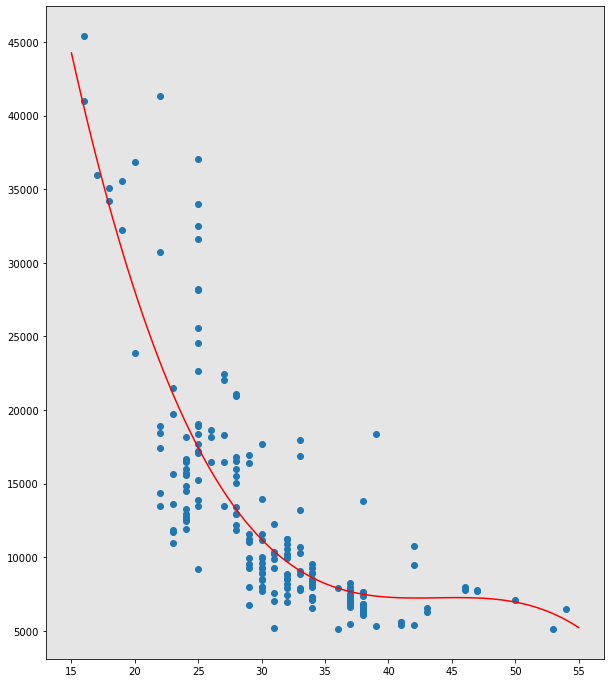

In [27]:
fig3, ax3 = plt.subplots(figsize=(width,height))
#ax3.set_facecolor((0.898, 0.898, 0.898))
ax3.scatter(x="highway-mpg",y="price",data=df)
ax3.plot(x_new,y_new,color="r")

<p><b>Remark</b> that we can have Multivariate Polynomial function.</p>
<p> For example with predicators $X_1, X_2$ we have </p>
<center> $\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \beta_4 X_{1}^2 + \beta_5 X_{2}^2$ </center>
<p> We can simply calculate that using PolynomialFeatures </p>

In [28]:
# from sklearn.preprocessing import PolynomialFeatures

<h2> Pipeline </h2>
<p> In a typical data processing pipeline, the data is first collected and cleaned to remove any errors, duplicates, or missing values. The cleaned data is then preprocessed, which may involve transforming the data into a different format, scaling or normalizing the data, or extracting relevant features. Next, the preprocessed data is fed into a machine learning model, which is trained on a subset of the data and then used to make predictions on new data. Finally, the predictions are evaluated and analyzed to draw insights and make decisions. </p>

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Input=[('scale',StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)), 
    ('model',LinearRegression())]
pipe=Pipeline(Input)
print(pipe)

Z = Z.astype(float)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:4]

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])


array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

<h2> Measures for In-Sample Evaluation </h2>
<p> 
<ul>
    <li> R^2 </li>
    <p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>
    <li> Mean Squared Error (MSE) </li>
    <p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>
</ul>
</p>

In [31]:
lm = LinearRegression()
x = df[["highway-mpg"]]
y = df["price"]
lm.fit(x,y)
# find R-squared
print(f"The R^2 = {lm.score(x,y)}")

The R^2 = 0.4965911884339175


We can intrepret the output this way: Model predicts $\approx 49.66 %$ of the variation of the price explained by highway-mpg. <p> Lets calulate MSE. </p>

In [32]:
from sklearn.metrics import mean_squared_error
Yhat=lm.predict(x)
mse = mean_squared_error(df["price"],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


How to interpret MSE? It is the best to create few types of models and compare their MSE. Model with  smallest MSE is a better fit for the data.